<a href="https://colab.research.google.com/github/BheemeshPujari/Binary-Classification-with-a-Bank-Churn-Dataset.ipynb/blob/main/Binary_Classification_with_a_Bank_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task is to predict whether a customer continues with their account or closes it (e.g., churns).objective is to predict the probability of Exited

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/playground-series-s4e1/train.csv')
test_data = pd.read_csv("/content/drive/MyDrive/playground-series-s4e1/test.csv")

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [7]:
train_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [8]:
## Finding any Null values are present or Not
train_data.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
##Finding any Null Values are present or Not
test_data.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## Exploratory Data Analysis

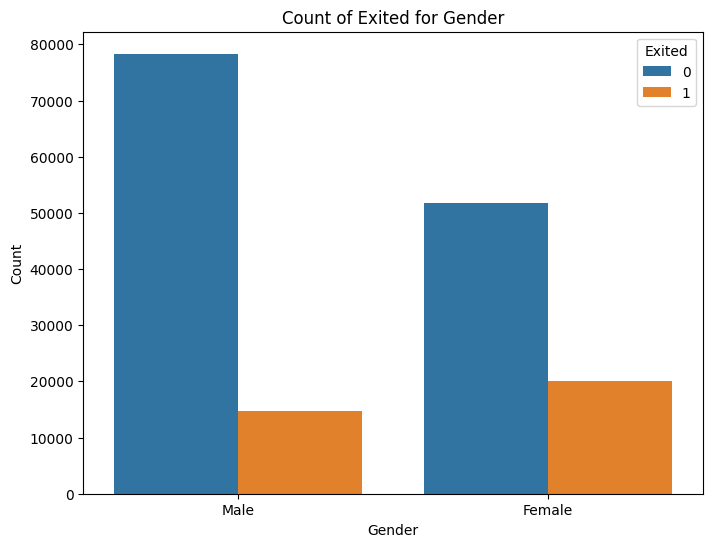

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=train_data)
plt.title('Count of Exited for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

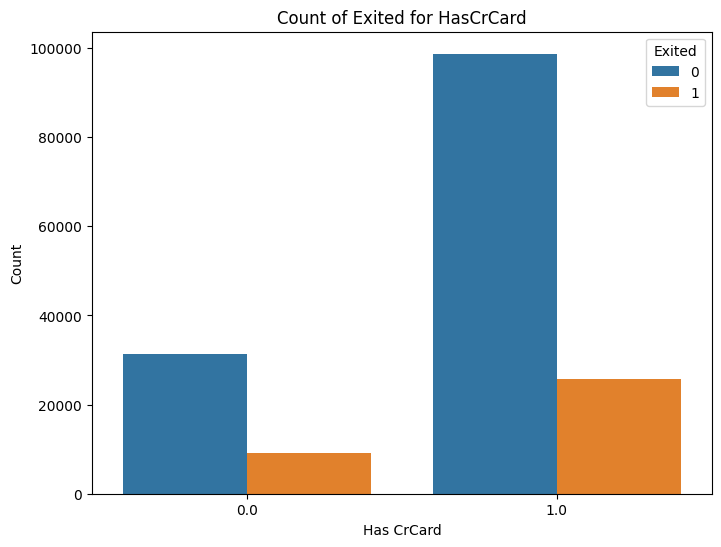

In [12]:
# has a credit card (1 = yes, 0 = no)
# Whether the customer has churned (1 = yes, 0 = no)
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=train_data)
plt.title('Count of Exited for HasCrCard')
plt.xlabel('Has CrCard')
plt.ylabel('Count')
plt.show()

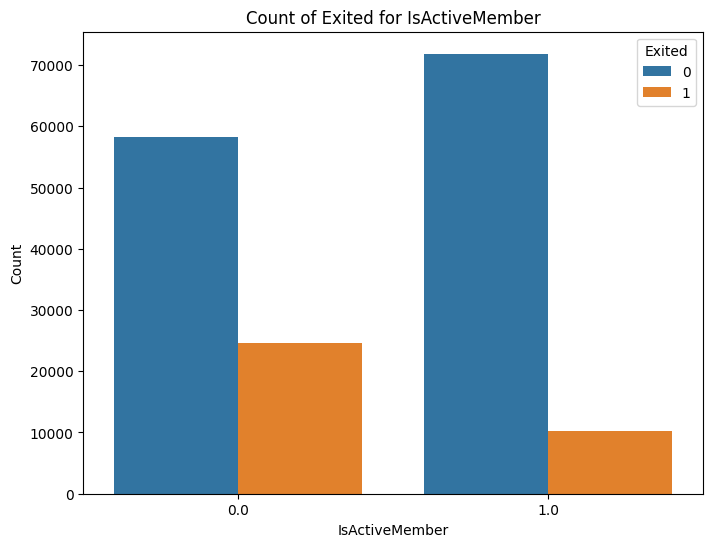

In [21]:
# Whether the customer is an active member (1 = yes, 0 = no)
# Whether the customer has churned (1 = yes, 0 = no)
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=train_data)
plt.title('Count of Exited for IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.show()

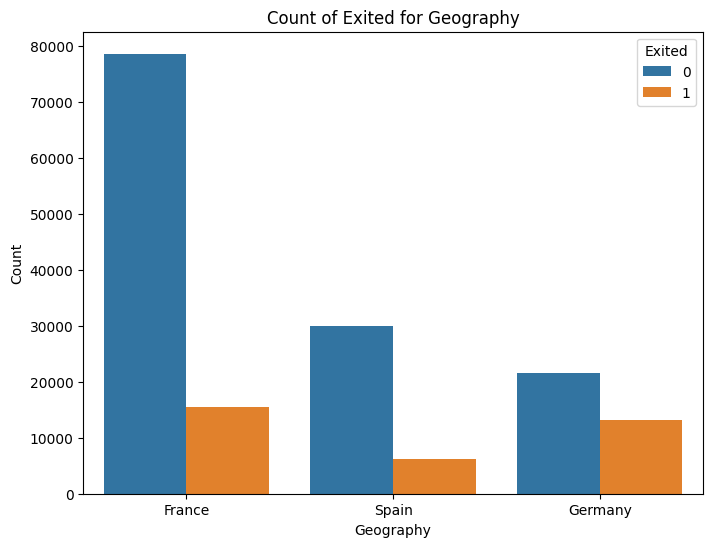

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x='Geography', hue='Exited', data=train_data)
plt.title('Count of Exited for Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

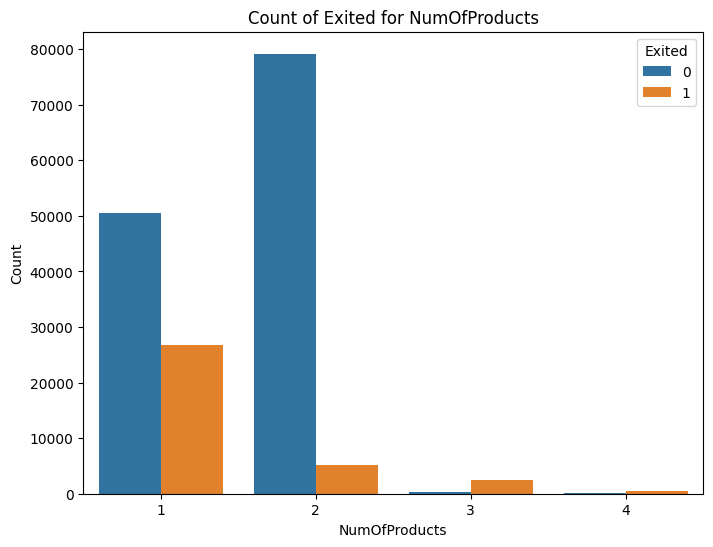

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='NumOfProducts', hue='Exited', data=train_data)
plt.title('Count of Exited for NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')

In [13]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


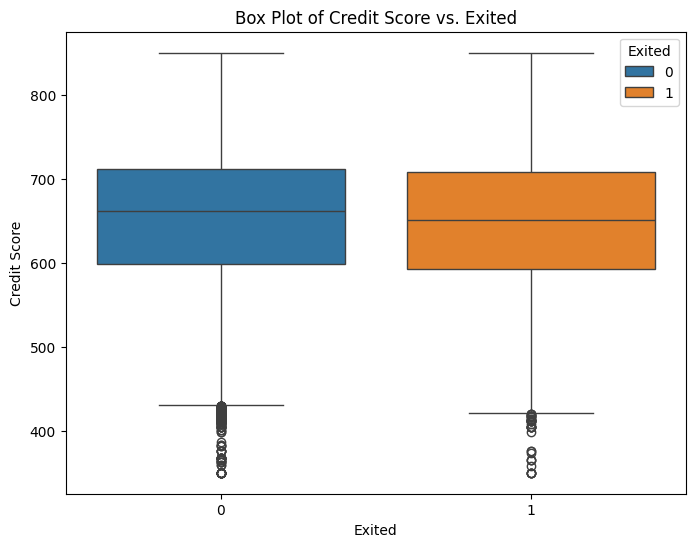

In [19]:
# prompt: box plot for credit score and exited

plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore',hue ='Exited', data=train_data)
plt.title('Box Plot of Credit Score vs. Exited')
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.show()